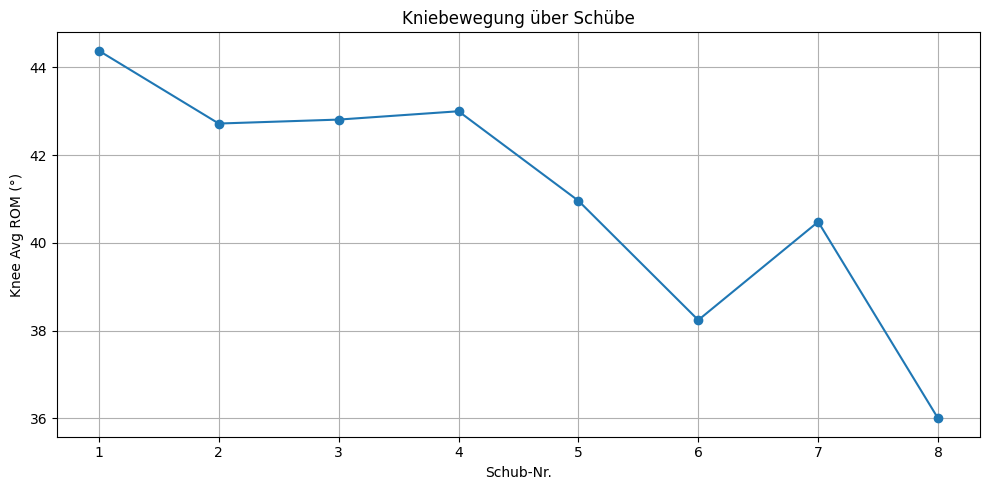

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Pfad zur CSV-Datei (anpassen!)
csv_pfad = r"c:\Arbeitsplatz\Studium_Innsbruck\Bewegungsanalyse\MGST_23_Bewegungsanalyse_LL_Doppelstock\Data_nach_Auswertung\Dominic_Flach_4_avg_rom.csv"

# CSV einlesen und Kommentarzeilen überspringen
df = pd.read_csv(csv_pfad, sep=";", comment="#")

# Nur gültige Zeilen mit Knee-Werten behalten (NaNs vermeiden)
df_clean = df[pd.to_numeric(df["Knee Avg ROM"], errors="coerce").notna()]

# Schubnummer und Knie-ROM-Werte extrahieren
x = df_clean["Schub-Nr."]
y = df_clean["Knee Avg ROM"]

# Plot erstellen
plt.figure(figsize=(10, 5))
plt.plot(x, y, marker="o", linestyle="-")
plt.xlabel("Schub-Nr.")
plt.ylabel("Knee Avg ROM (°)")
plt.title("Kniebewegung über Schübe")
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
import os
import pandas as pd

# Pfad zum Ordner mit den Dateien
daten_ordner = r"c:\Arbeitsplatz\Studium_Innsbruck\Bewegungsanalyse\MGST_23_Bewegungsanalyse_LL_Doppelstock\Data_nach_Auswertung"

# Alle Dateien mit "_avg_rom.csv" im Namen
dateien = [f for f in os.listdir(daten_ordner) if f.endswith("_avg_rom.csv")]

# Liste für alle DataFrames
alle_dfs = []

# Optional: Dictionary zur Zuordnung von Dateiname -> DataFrame
daten_dict = {}

for datei in dateien:
    pfad = os.path.join(daten_ordner, datei)
    
    # Kommentare mit "#" ignorieren
    df = pd.read_csv(pfad, sep=";", comment="#")

    # Dateiname ohne Erweiterung als Schlüssel (z.B. Dominic_Flach_1)
    name = os.path.splitext(datei)[0]

    # Speichern in Liste und Dict
    alle_dfs.append(df)
    daten_dict[name] = df

print(f"{len(alle_dfs)} Dateien erfolgreich eingelesen.")


11 Dateien erfolgreich eingelesen.


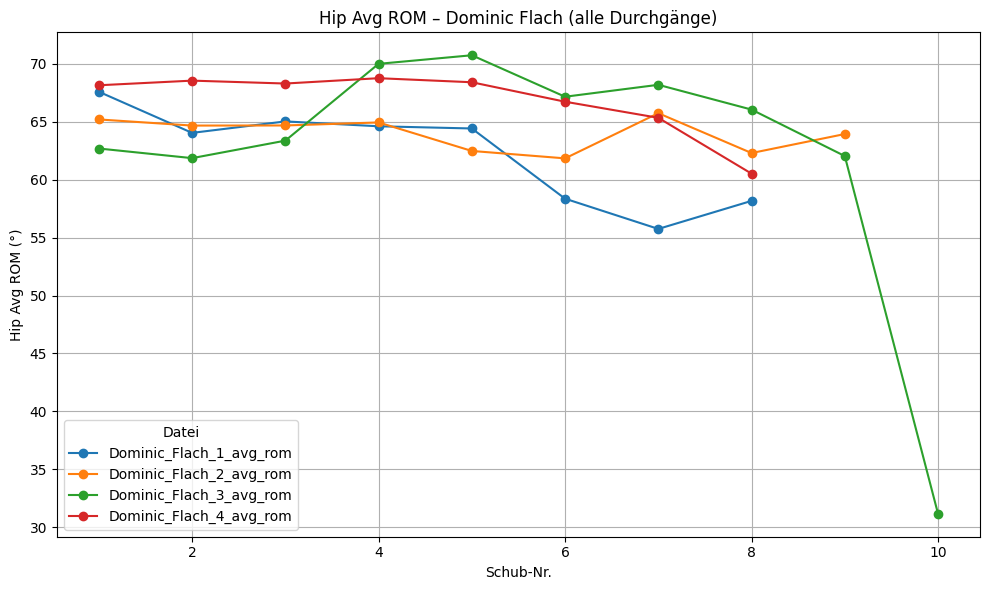

In [7]:
import matplotlib.pyplot as plt

# Nur die Dateien von Dominic_Flach auswählen
dominic_dfs = {name: df for name, df in daten_dict.items() if name.startswith("Dominic_Flach")}

# Plot vorbereiten
plt.figure(figsize=(10, 6))

for name, df in sorted(dominic_dfs.items()):
    # Nur gültige Hip-ROM-Werte verwenden
    df_clean = df[pd.to_numeric(df["Hip Avg ROM"], errors="coerce").notna()]

    plt.plot(df_clean["Schub-Nr."], df_clean["Hip Avg ROM"], marker="o", label=name)

# Achsenbeschriftung und Titel
plt.xlabel("Schub-Nr.")
plt.ylabel("Hip Avg ROM (°)")
plt.title("Hip Avg ROM – Dominic Flach (alle Durchgänge)")
plt.legend(title="Datei")
plt.grid(True)
plt.tight_layout()
plt.show()
